In [24]:
import pandas as pd 
import numpy as np 


In [25]:
df = pd.read_csv('email.csv')
df.head(3)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## **Data Preprocessing**

In [26]:
df.describe()

,Category,Message
count,5573,5573
unique,3,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [27]:
# Null Values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [41]:
df["Category"] = df["Category"].astype('string')
df["Message"] = df["Message"].astype('string')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   string
 1   Message   5572 non-null   string
dtypes: string(2)
memory usage: 87.2 KB


In [43]:
df.shape

(5572, 2)

In [44]:
df.tail(3)

,Category,Message
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [45]:
df.tail(3)

,Category,Message
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


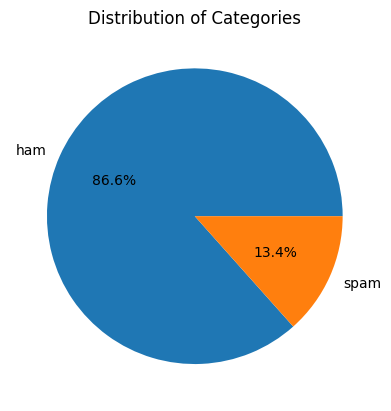

In [46]:
import matplotlib.pyplot as plt

# Assuming 'Category' is the column containing the categories in your DataFrame 'df'
viz = df['Category']

# Create a pie chart to visualize the distribution of categories
viz.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Categories')
plt.ylabel('')  # Remove the ylabel to make the plot cleaner
plt.show()


## **Modeling**

In this project, we will try to predict if an email is a span or not, so for that we will be using `Naive Bayes` as an algorithm for this problem.


### **Vectrorizing:**

**Convert dataframe column values into numerical values for training**

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
df.head(4)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


### **Train/Test dataset:**

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.Message, df.Category, test_size=0.25)

In [56]:
x_train.describe()

count                       4179
unique                      3938
top       Sorry, I'll call later
freq                          20
Name: Message, dtype: object

### **Vectorizing:**

In [58]:
# Find word counts && store data as matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

In [59]:
x_train_count

<4179x7543 sparse matrix of type '<class 'numpy.int64'>'
	with 55841 stored elements in Compressed Sparse Row format>

**That means 7543 unique words that appeared all long the matrix columns**

### **Training:**

In [63]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train_count, y_train) # y_train is already numeric

MultinomialNB()

### **Pre-test:**

In [64]:
# Ham
email_ham = ["Hi, wanna hangout today?"]
email_ham_count = cv.transform(email_ham)
model.predict(email_ham_count)


array([0], dtype=int64)

*Predited as ham email*

In [67]:
# Spam
email_spam = ["Reward 200$ money"] #Naive Bayes, words order doesn't matter
email_spam_count = cv.transform(email_spam)
model.predict(email_spam_count)

array([1], dtype=int64)

*Predicted as spam email*

### **Testing Model:**

ROC-AUC Score: 0.9847725338125413


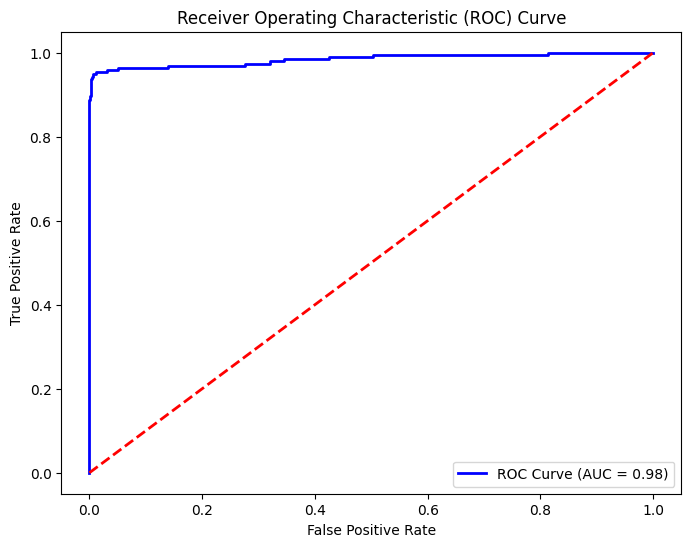

In [80]:
from sklearn.metrics import roc_auc_score, roc_curve

# `x_test_count` is test data after vectorization
probs = model.predict_proba(x_test_count)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, probs)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The classifier is achieving very high true positive rates while keeping false positive rates relatively low, which is indicative of strong performance.

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score


# Evaluation Metrics:

# Test Predictions
yhat = model.predict(x_test_count)

accuracy = accuracy_score(y_test, yhat)
precision = precision_score(y_test, yhat)
recall = recall_score(y_test, yhat)
f1score = f1_score(y_test, yhat)
jaccard = jaccard_score(y_test, yhat)

#Output

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1score)
print("Jaccard Index:", jaccard)

Accuracy: 0.9877961234745154
Precision: 0.9783783783783784
Recall: 0.9329896907216495
F1 Score: 0.9551451187335093
Jaccard Index: 0.9141414141414141


In [68]:
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

0.9877961234745154

**98%, means the model performs well on unseen data, as it can predict the correct labels for about 98.78% of the test instances.**

In [81]:
# Save model
from joblib import dump

dump(model, 'email_spam_detection.joblib')


['email_spam_detection.joblib']

## **By [Abdessamd Touzani](https://www.linkedin.com/in/abdessamadtouzani)**